In [ ]:
import pandas as pd


In [ ]:
data1=pd.read_csv("sts-train.csv",on_bad_lines='skip',header=None ,sep="\t")
drop_cols=[0,1,2,3]
data1=data1.drop(columns=drop_cols)
data1

,4,5,6
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5504,1.20,"Palestinian hunger striker, Israel reach deal",Palestinian activist detained in Israeli raid
5505,4.80,Assad says Syria will comply with UN arms reso...,Syria's Assad vows to comply with U.N. resolution
5506,4.60,South Korean President Sorry For Ferry Response,S. Korean president 'sorry' for ferry disaster
5507,0.00,Food price hikes raise concerns in Iran,American Chris Horner wins Tour of Spain


In [ ]:
rename_cols={4:"C_score",5:"sent1",6:"sent2"}
data1=data1.rename(columns=rename_cols)
data1

,C_score,sent1,sent2
0,5.00,A plane is taking off.,An air plane is taking off.
1,3.80,A man is playing a large flute.,A man is playing a flute.
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,2.60,Three men are playing chess.,Two men are playing chess.
4,4.25,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5504,1.20,"Palestinian hunger striker, Israel reach deal",Palestinian activist detained in Israeli raid
5505,4.80,Assad says Syria will comply with UN arms reso...,Syria's Assad vows to comply with U.N. resolution
5506,4.60,South Korean President Sorry For Ferry Response,S. Korean president 'sorry' for ferry disaster
5507,0.00,Food price hikes raise concerns in Iran,American Chris Horner wins Tour of Spain


In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=9bafc26bab6c606661df092e05774e922e2a79621fd399e757c72a847d243ffb
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer ,WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def sent_preprocess(sentence):
  sentence=sentence.lower()
  tokens=word_tokenize(sentence)
  stop_words_set=set(stopwords.words("english"))
  new_tokens=[word for word in tokens if word not in stop_words_set]
  new_tokens = [word for word in new_tokens if word.isalnum()]
  lematize_stemed=[lemmatizer.lemmatize(stemmer.stem(word)) for word in new_tokens]
  processed_sentence = " ".join(lematize_stemed)
  encoded_vector = model.encode(processed_sentence)

  return encoded_vector





In [ ]:
input_sentence = "I am learning machine learning; it is very tough but it is fun and i enjoy it."
processed_tokens = sent_preprocess(input_sentence)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def cosine_score(sentence1,sentence2):
  v1=sent_preprocess(sentence1)
  v2=sent_preprocess(sentence2)
  similarity_score = cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))[0][0]
  #input vectors have been reshaped to have one row, the result is a 1x1 matrix.
  Cosine_score = (similarity_score)

  return Cosine_score




In [ ]:
sentence1 = "A plane is taking off."
sentence2 = "An air plane is taking off."
similarity = cosine_score(sentence1, sentence2)
print("Cosine Similarity between Sentences:", similarity)

Cosine Similarity between Sentences: 0.8986165


In [ ]:
#using the dataset sts here
similarities=[]
for index,row in data1.iterrows():
  sentence1=str(row["sent1"])
  sentence2=str(row["sent2"])
  similarity = cosine_score(sentence1, sentence2)
  similarities.append(similarity)

data1['new_cosine_similarity'] = similarities

data1

,C_score,sent1,sent2,new_cosine_similarity
0,5.00,A plane is taking off.,An air plane is taking off.,0.898616
1,3.80,A man is playing a large flute.,A man is playing a flute.,0.813854
2,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,0.953385
3,2.60,Three men are playing chess.,Two men are playing chess.,0.749980
4,4.25,A man is playing the cello.,A man seated is playing the cello.,0.873713
...,...,...,...,...
5504,1.20,"Palestinian hunger striker, Israel reach deal",Palestinian activist detained in Israeli raid,0.438671
5505,4.80,Assad says Syria will comply with UN arms reso...,Syria's Assad vows to comply with U.N. resolution,0.832696
5506,4.60,South Korean President Sorry For Ferry Response,S. Korean president 'sorry' for ferry disaster,0.737805
5507,0.00,Food price hikes raise concerns in Iran,American Chris Horner wins Tour of Spain,-0.019542


In [ ]:
from scipy.stats import pearsonr


p_actual_similarity = data1["C_score"]
p_predicted_similarity = data1["new_cosine_similarity"]

pearson_corr, _ = pearsonr(p_actual_similarity, p_predicted_similarity)

print(f"Pearson's Correlation Coefficient: {pearson_corr}")


Pearson's Correlation Coefficient: 0.7868622701908813


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

actual_similarity = data1["C_score"]
predicted_similarity = data1["new_cosine_similarity"]

mse = mean_squared_error(actual_similarity, predicted_similarity)

rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.7199273835326414


predicted similarity values are approximately 1.7199 units away from the actual similarity values.

In [ ]:
import matplotlib.pyplot as plt


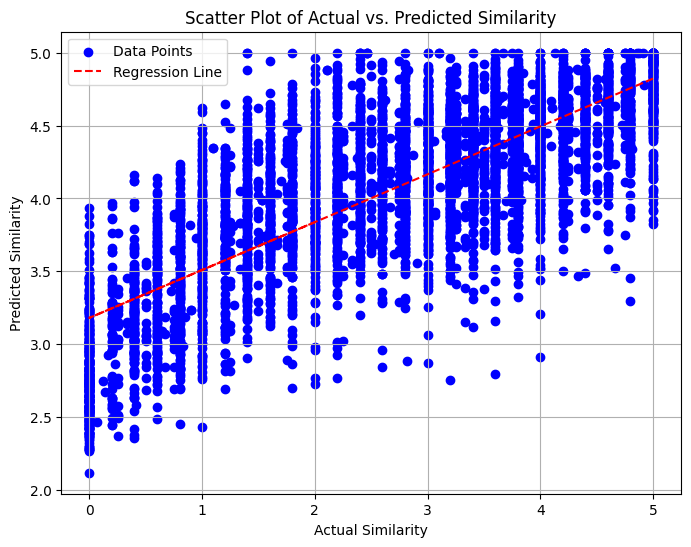

In [ ]:
# Add labels and a title
plt.figure(figsize=(8, 6))
plt.scatter(p_actual_similarity,p_predicted_similarity, c='blue', label='Data Points')
plt.xlabel('Actual Similarity')
plt.ylabel('Predicted Similarity')
plt.title('Scatter Plot of Actual vs. Predicted Similarity')
z = np.polyfit(p_actual_similarity, p_predicted_similarity, 1)
p = np.poly1d(z)
plt.plot(actual_similarity,p(actual_similarity),"r--", label='Regression Line')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()